In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
import plotly as __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [126]:
init_notebook_mode(connected=True)   

# Link Plotly JS libraries to python

In [127]:
# Will run Cufflinks Off line

cf.go_offline()

In [109]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

ModuleNotFoundError: No module named 'chart_studio'

In [ ]:
init_notebook_mode(connected=True)

In [3]:
sns.set_style('whitegrid')

In [4]:
anz = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [5]:
anz.shape

(12043, 23)

In [6]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [7]:
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


<AxesSubplot:>

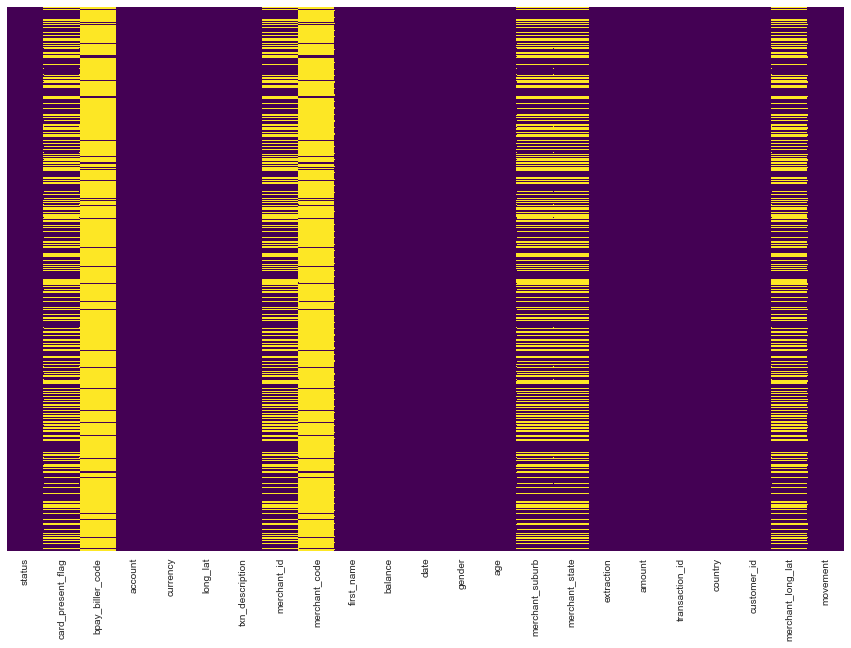

In [8]:
# Creating a heat map to see where we have major missing data

plt.figure(figsize=(15,10))
sns.heatmap(anz.isnull(),yticklabels=False, cbar=False, cmap="viridis")

In [9]:
# Missing values
def missing_values_table(anz):
        mis_val = anz.isnull().sum()
        mis_val_percent = 100 * anz.isnull().sum() / len(anz)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(anz.shape[1]))   
        print("There are " + str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(anz).style.background_gradient(cmap='vlag_r')


Your selected dataframe has 23
There are 7 columns that have missing values.


,Missing Values,% of Total Values
merchant_code,11160,92.700000
bpay_biller_code,11158,92.700000
card_present_flag,4326,35.900000
merchant_id,4326,35.900000
merchant_suburb,4326,35.900000
merchant_state,4326,35.900000
merchant_long_lat,4326,35.900000


In [10]:
anz['bpay_biller_code'].unique()

array([nan, 0, ' THE DISCOUNT CHEMIST GROUP',
       ' LAND WATER & PLANNING East Melbourne'], dtype=object)

In [11]:
anz['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [12]:
anz[anz["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73
...,...,...,...,...,...
CUS-72755508,NaN,0.0,4558.675833,35,725.32
CUS-809013380,NaN,0.0,5579.186154,21,1037.07
CUS-860700529,NaN,0.0,4221.468333,30,1808.62


In [13]:
anz[anz['first_name'] == 'Diana']['merchant_suburb'].value_counts()

Southport      42
Broadbeach     26
Robina         19
Helensvale     17
Palm Beach     17
               ..
Millmerran      1
Docklands       1
Birkdale        1
Caffey          1
South Yarra     1
Name: merchant_suburb, Length: 138, dtype: int64

In [14]:
anz['merchant_long_lat'].iloc[0].split()[0]

'153.38'

### Eploratory Data Analysis

#### Total number of transactions made on each day

In [15]:
anz['date'].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

#### Total number of transactions made by each customer

In [16]:
anz['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

#### Creating a new Column for Day and Month

In [17]:
anz['date'] = pd.to_datetime(anz['date'])

In [18]:
anz['week_day'] = anz['date'].dt.day_name()

In [19]:
anz['month'] = anz['date'].dt.month_name()

In [20]:
#anz.head(3)

#### Transaction volume each day

In [21]:
anz_date_count = anz.groupby("date").count()

In [22]:
trans_vol = anz_date_count["customer_id"].mean()
n_points = len(anz_date_count.index)

In [23]:
anz_date_mean = anz.groupby("date").mean()

In [24]:
trans_amt = anz_date_mean["amount"].mean()
n_points = len(anz_date_count.index)

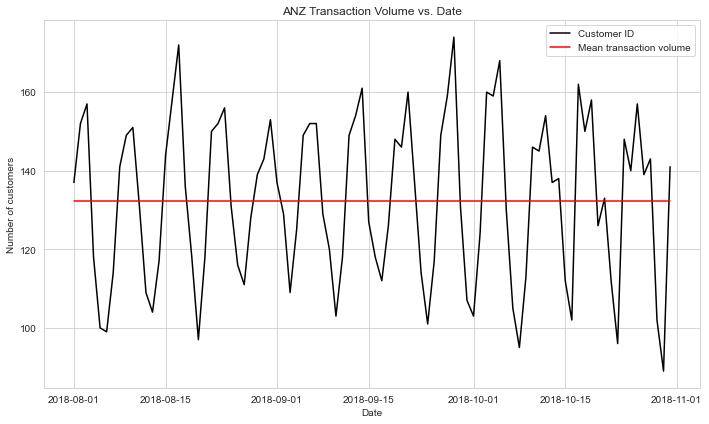

In [25]:
plt.figure(figsize=(10,6))
plt.plot(anz_date_count.index, anz_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(anz_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()


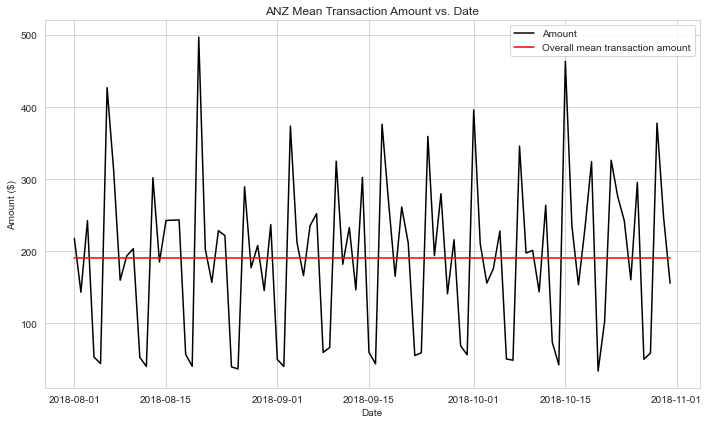

In [26]:
# Average monthl
plt.figure(figsize=(10,6))
plt.plot(anz_date_count.index, anz_date_mean["amount"], c="black", label = "Amount")
plt.plot(anz_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [27]:
anz.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'week_day', 'month'],
      dtype='object')

#### Mean customer balance and payment amount by age

In [28]:
anz_cus= anz.groupby("customer_id").mean()
anz_gen =anz.groupby("gender").mean()

In [29]:
mean_f_bal = anz_gen["balance"].iloc[0]
mean_m_bal = anz_gen["balance"].iloc[1]
n_points = len(anz_cus["age"])

Mean


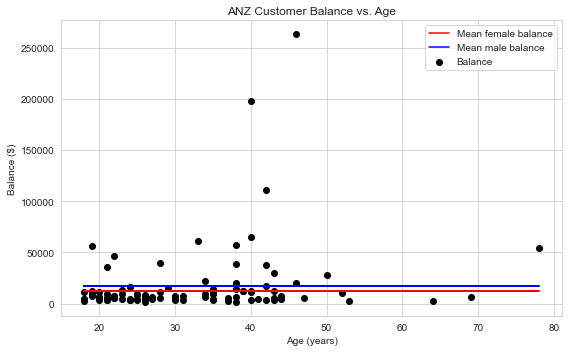

In [30]:
print("Mean")
plt.figure(figsize=(8,5))
plt.scatter(anz_cus["age"], anz_cus["balance"], c="black", label="Balance")
plt.plot(anz_cus["age"], np.linspace(mean_f_bal,mean_f_bal,n_points), c="r", label = "Mean female balance")
plt.plot(anz_cus["age"], np.linspace(mean_m_bal,mean_m_bal,n_points), c="b", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [31]:
mean_f_amt = anz_gen["amount"].iloc[0]
mean_m_amt = anz_gen["amount"].iloc[1]

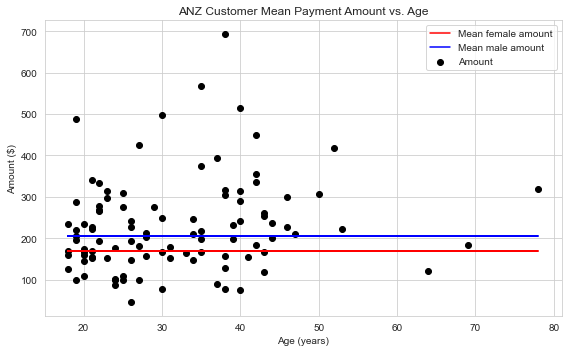

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(anz_cus["age"], anz_cus["amount"], c="black", label="Amount")
plt.plot(anz_cus["age"], np.linspace(mean_f_amt,mean_f_amt,n_points), c="r", label = "Mean female amount")
plt.plot(anz_cus["age"], np.linspace(mean_m_amt,mean_m_amt,n_points), c="b", label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

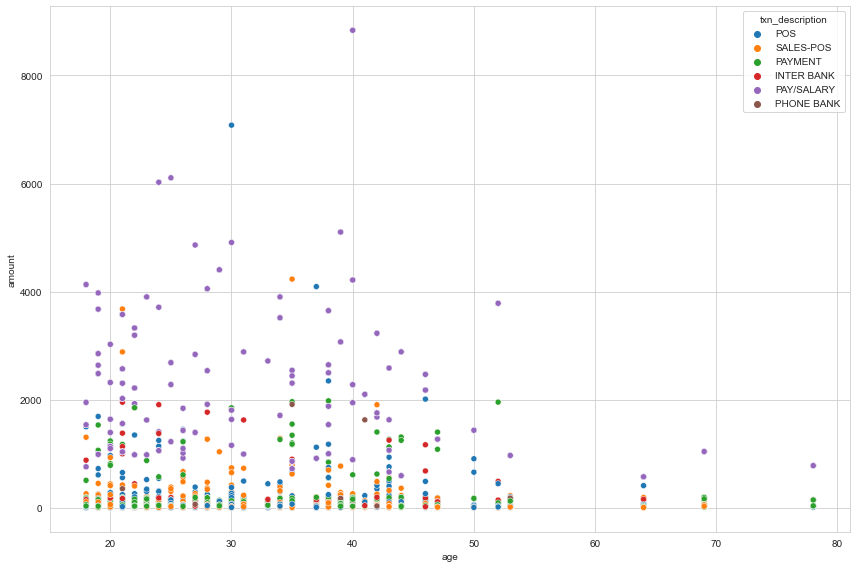

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age', y='amount', data=anz, hue='txn_description', markers=True)

plt.tight_layout()

#### Bivariate Analysis on Amount Vs Transaction Description on monthly Basis

In [34]:
anz_amount = anz[['amount','month','txn_description']].groupby(['month','txn_description']).sum().unstack()

In [35]:
anz_amount

amount                                                   
txn_description INTER BANK PAY/SALARY  PAYMENT PHONE BANK       POS SALES-POS
month                                                                        
August             18823.0  559814.33  55673.0     4026.0  48542.73  43056.46
October            23250.0  600166.91  69811.0     2627.0  58008.15  48935.41
September          22258.0  516595.61  76310.0     4063.0  46310.36  65013.24

<Figure size 1440x1440 with 0 Axes>

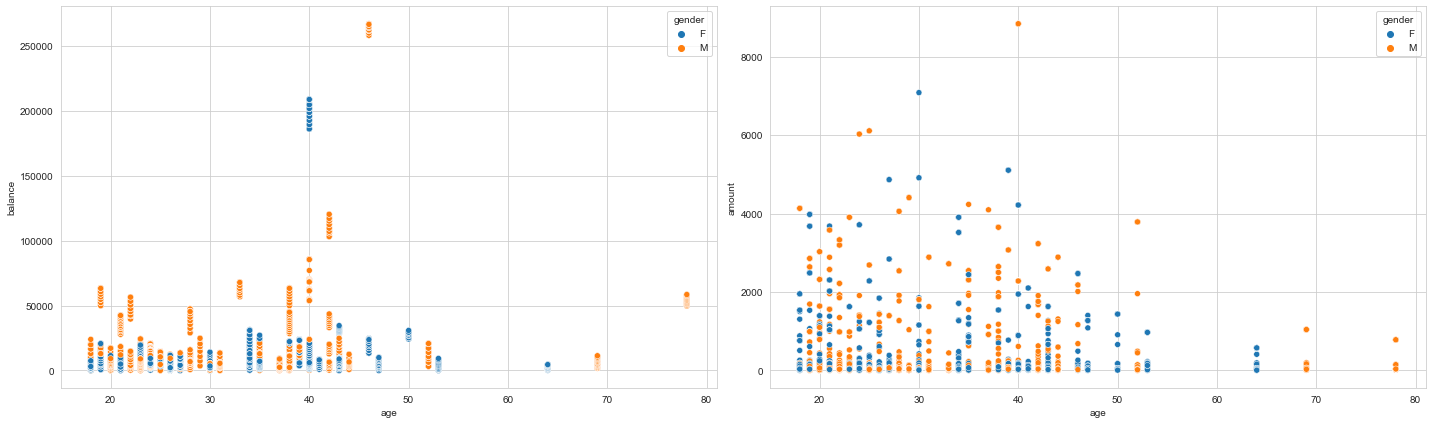

In [51]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.scatterplot(x=anz.age, y=anz.balance,hue=anz.gender, ax = ax[0])
sns.scatterplot(x=anz.age, y=anz.amount,hue=anz.gender, ax= ax[1])
plt.tight_layout()

In [43]:
sns.scatterplot(x=anz.age, y=anz.balance, ax = ax[0])

0        F
1        F
2        M
3        F
4        F
        ..
12038    F
12039    M
12040    M
12041    M
12042    M
Name: gender, Length: 12043, dtype: object

#### checking the count of month wise transaction

October      4087
September    4013
August       3943
Name: month, dtype: int64


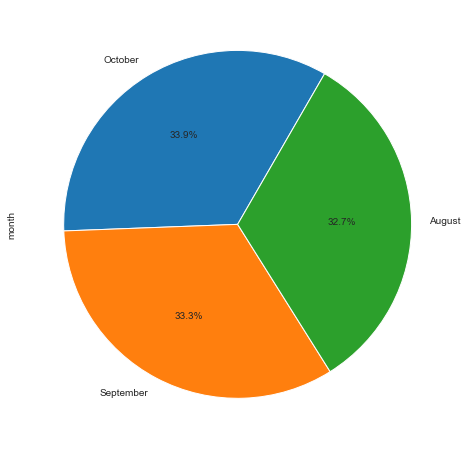

In [68]:
plt.figure(figsize=(8,8))
print(anz['month'].value_counts())
explode=(0.1,0.05,0.05)
anz['month'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.show()

#### Proportion Of Type of Transaction

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


<AxesSubplot:ylabel='txn_description'>

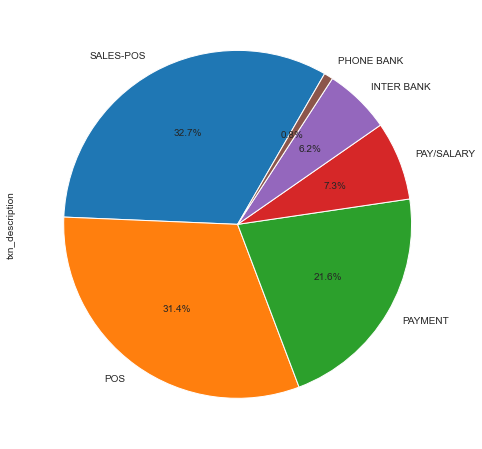

In [69]:
plt.figure(figsize=(8,8))
print(anz['txn_description'].value_counts())
anz['txn_description'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

#### Weekly Transaction Spread

PAYMENT       193
SALES-POS     180
POS           167
PAY/SALARY    106
INTER BANK     40
Name: txn_description, dtype: int64


<AxesSubplot:ylabel='txn_description'>

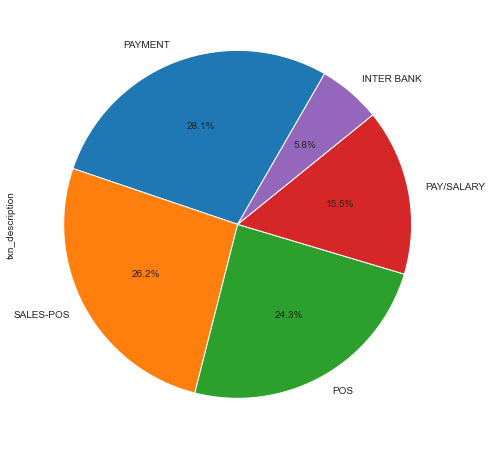

In [122]:
plt.figure(figsize=(8,8))
print(anz[(anz['week_day']=='Monday') & (anz['gender']=="M")]['txn_description'].value_counts())
anz[(anz['week_day']=='Monday') & (anz['gender']=="M")]['txn_description'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

SALES-POS     208
POS           187
PAYMENT       118
PAY/SALARY    101
INTER BANK     59
PHONE BANK      1
Name: txn_description, dtype: int64


<AxesSubplot:ylabel='txn_description'>

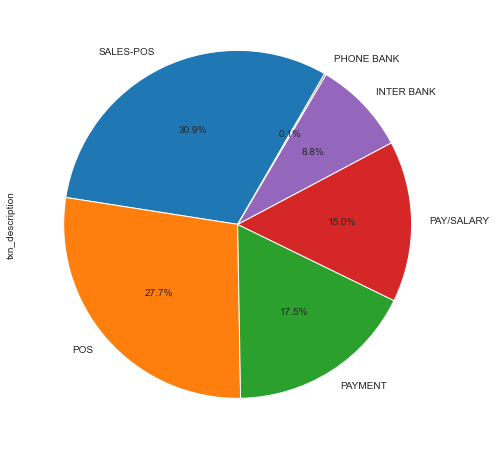

In [121]:
plt.figure(figsize=(8,8))
prin`t(anz[(anz['week_day']=='Monday') & (anz['gender']=="F")]['txn_description'].value_counts())
anz[(anz['week_day']=='Monday') & (anz['gender']=="F")]['txn_description'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

#### State WiseTransaction Detail

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64


<AxesSubplot:ylabel='merchant_state'>

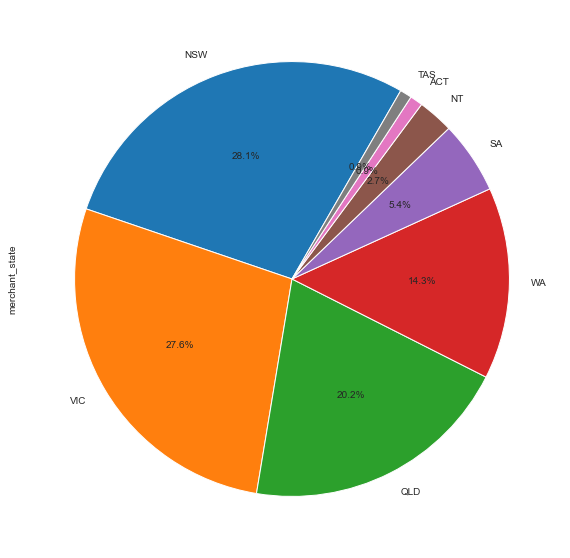

In [197]:
plt.figure(figsize=(10,10))
print(anz['merchant_state'].value_counts())
explode=(0.1,0.05,0.05)
anz['merchant_state'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)

#### Top 5 POS and Sales-POS Transacting Customer

In [237]:
x = anz[(anz['txn_description']=='POS') | (anz['txn_description']=='SALES-POS')].groupby(['first_name','customer_id'])['transaction_id'].count()

In [238]:
x = pd.DataFrame(x,columns=['transaction_id']).reset_index()

In [239]:
x = x.sort_values('transaction_id',ascending=False).head(5)

In [240]:
x

,first_name,customer_id,transaction_id
21,Diana,CUS-2487424745,531
65,Michael,CUS-2142601169,276
96,Tonya,CUS-3026014945,248
75,Rhonda,CUS-1614226872,220
36,Jeffrey,CUS-860700529,206


In [241]:
x.columns

Index(['first_name', 'customer_id', 'transaction_id'], dtype='object')

<AxesSubplot:>

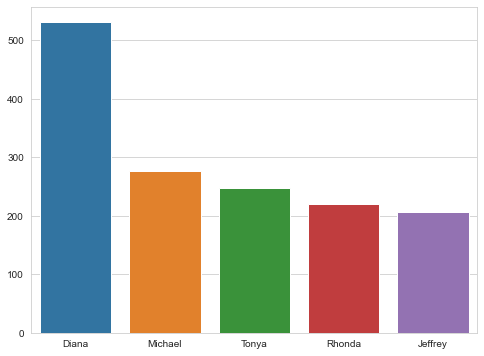

In [248]:
plt.figure(figsize=(8,6))
sns.barplot(x=x['first_name'].values, y=x['transaction_id'].values,)

In [250]:
anz.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'week_day', 'month'],
      dtype='object')

In [348]:
anz_POS =  anz[(anz['txn_description']=='POS') | (anz['txn_description']=='SALES-POS')]

In [349]:
anz_POS.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,week_day,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,August
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,August


In [350]:
x.columns

Index(['first_name', 'customer_id', 'transaction_id'], dtype='object')

In [380]:
customer_id=x['customer_id']
customer=anz_POS[anz_POS['customer_id']==customer_id.iloc[0]]

In [352]:
customer_id.iloc[0]

'CUS-2487424745'

In [363]:
customer_id

21    CUS-2487424745
65    CUS-2142601169
96    CUS-3026014945
75    CUS-1614226872
36     CUS-860700529
Name: customer_id, dtype: object

In [354]:
customer.head(6)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,week_day,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,August
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,August
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday,August
20,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,f2ef6270-cf91-409f-a6a2-fbd6735ea500,NaN,Diana,...,NSW,2018-08-01T08:09:42.000+0000,14.10,1c12c9ad77894ef8b507fb091e41e928,Australia,CUS-2487424745,153.6 -28.63,debit,Wednesday,August
111,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,44abc19c-aa5c-40bd-b1d0-9b2f236189ea,NaN,Diana,...,QLD,2018-08-01T18:19:29.000+0000,10.67,cd0113426970425a8524e55f4079408f,Australia,CUS-2487424745,153.41 -28.01,debit,Wednesday,August
117,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,73aac058-cb31-46c2-826d-29b161bfb23e,NaN,Diana,...,QLD,2018-08-01T19:33:51.000+0000,11.28,9a13829c885344c3ad6c6f1a2d30d1bc,Australia,CUS-2487424745,153.47 -28.13,debit,Wednesday,August


In [384]:
customer['amount'].sum()

9819.210000000001

In [362]:
# customer.groupby(['merchant_state', 'first_name', 'amount']).size().to_frame('count').reset_index()

In [321]:
cust_by_state = customer.groupby(['merchant_state', 'first_name']).size().to_frame('count').reset_index()

In [322]:
cust_by_state

,merchant_state,first_name,count
0,NSW,Diana,63
1,NT,Diana,1
2,QLD,Diana,444
3,SA,Diana,1
4,VIC,Diana,17
5,WA,Diana,5


In [323]:
most_no_pos_trxn = cust_by_state.sort_values('count', ascending=False).head(1)

In [326]:
most_no_pos_trxn

,merchant_state,first_name,count
2,QLD,Diana,444


In [334]:
most_no_pos_trxn['merchant_state'].iloc[0]

'QLD'

In [344]:
amt = customer[customer['merchant_state']==most_no_pos_trxn['merchant_state'].iloc[0]]['amount'].sum()

In [345]:
print(f"The customer {customer['first_name'].iloc[0]} has shopped in {most_no_pos_trxn['merchant_state'].iloc[0]} a number of {most_no_pos_trxn['count'].iloc[0]} times amounting to {amt}")

The customer Diana has shopped in QLD a number of 444 times amounting to 7281.97


In [347]:
# Top states of the Top 5 customers where they shopped

for cid in customer_id:
    customer=anz_POS[anz_POS['customer_id']==cid]
    #print(cid)
    cust_by_state = customer.groupby(['merchant_state', 'first_name']).size().to_frame('count').reset_index()
    most_no_pos_trxn = cust_by_state.sort_values('count', ascending=False).head(1)
    amt = customer[customer['merchant_state']==most_no_pos_trxn['merchant_state'].iloc[0]]['amount'].sum()
    print(f"The customer {customer['first_name'].iloc[0]} has shopped in {most_no_pos_trxn['merchant_state'].iloc[0]} a number of {most_no_pos_trxn['count'].iloc[0]} times amounting to {np.round(amt,2)}.")
    print('\n')
    

The customer Diana has shopped in QLD a number of 444 times amounting to 7281.97.


The customer Michael has shopped in NSW a number of 227 times amounting to 8822.13.


The customer Tonya has shopped in WA a number of 191 times amounting to 4927.56.


The customer Rhonda has shopped in QLD a number of 185 times amounting to 5582.84.


The customer Jeffrey has shopped in QLD a number of 173 times amounting to 4004.95.




In [364]:
customer_id

21    CUS-2487424745
65    CUS-2142601169
96    CUS-3026014945
75    CUS-1614226872
36     CUS-860700529
Name: customer_id, dtype: object

In [418]:
anz[(anz['customer_id']==customer_id.iloc[2]) & (anz['txn_description']=='PAY/SALARY')]['amount'].sum()

19881.050000000003

In [377]:
anz[(anz['customer_id']==customer_id.iloc[0])]['balance'].mean()

1735.1206747404851

In [425]:
anz[(anz['customer_id']==customer_id.iloc[4]) & (anz['txn_description']=='PAYMENT')]['amount'].sum()

629.0

In [379]:
anz[(anz['customer_id']==customer_id.iloc[0]) & (anz['txn_description']=='INTER BANK')]['movement']

766      debit
1116     debit
1664     debit
2452     debit
3383     debit
4321     debit
5100     debit
5251     debit
6190     debit
7124     debit
8063     debit
9003     debit
9073     debit
9946     debit
10888    debit
11814    debit
Name: movement, dtype: object

In [411]:
x

,first_name,customer_id,transaction_id
21,Diana,CUS-2487424745,531
65,Michael,CUS-2142601169,276
96,Tonya,CUS-3026014945,248
75,Rhonda,CUS-1614226872,220
36,Jeffrey,CUS-860700529,206


In [426]:
# Top states of the Top 5 customers where they shopped

for cid in customer_id:
    #subsetting the data based custid
    customer=anz_POS[anz_POS['customer_id']==cid]
    #print(cid)
    # grouping the customer data on the basis state
    cust_by_state = customer.groupby(['merchant_state', 'first_name']).size().to_frame('count').reset_index()
    # Total transction Done by cusomter on POS and Sales-POS in last 3 months
    trxn = x[x['customer_id']== cid]['transaction_id'].iloc[0]
    # Total amount spend on all location on POS and SALE-POS
    tot_amt = np.round(customer['amount'].sum(),2)
    # state with maximum with no. of transaction
    most_no_pos_trxn = cust_by_state.sort_values('count', ascending=False).head(1)
    # amount of shopping done in state with maximum transaction
    amt = customer[customer['merchant_state']==most_no_pos_trxn['merchant_state'].iloc[0]]['amount'].sum()
    #total salary credited in last 3 months
    sal_tot = anz[(anz['customer_id']==cid) & (anz['txn_description']=='PAY/SALARY')]['amount'].sum()
    # Average Balance for last 3 months
    avg_bal = np.round(anz[(anz['customer_id']==cid)]['balance'].mean(),2)
    
    
    print(f"The total no of POS and Sales-POS transaction done by {customer['first_name'].iloc[0]} is {trxn} amounting to {tot_amt}")
    print(f"The customer {customer['first_name'].iloc[0]} has shopped in {most_no_pos_trxn['merchant_state'].iloc[0]} a number of {most_no_pos_trxn['count'].iloc[0]} times amounting to {np.round(amt,2)}.")
    print(f"The total salary credited for {customer['first_name'].iloc[0]} in last 3 months is {sal_tot}")
    print(f"The Average Balance maintained by {customer['first_name'].iloc[0]} in last 3 months is {avg_bal}")
    
    if avg_bal <= tot_amt:
        inter_bank = anz[(anz['customer_id']==cid) & (anz['txn_description']=='INTER BANK')]['amount'].sum()
        print(f"Customer is transfering {inter_bank} to other bank, even after utilising our card for maximum shoping through POS and Sales-POS")
        print(f"{customer['first_name'].iloc[0]}, is eroder customer.")
        print(f"we should engage with {customer['first_name'].iloc[0]} for attachments to retain money in our bank to increase average balance in account")
    print('\n')

The total no of POS and Sales-POS transaction done by Diana is 531 amounting to 9819.21
The customer Diana has shopped in QLD a number of 444 times amounting to 7281.97.
The total salary credited for Diana in last 3 months is 14191.38
The Average Balance maintained by Diana in last 3 months is 1735.12
Customer is transfering 536.0 to other bank, even after utilising our card for maximum shoping through POS and Sales-POS
Diana, is eroder customer.
we should engage with Diana for attachments to retain money in our bank to increase average balance in account


The total no of POS and Sales-POS transaction done by Michael is 276 amounting to 9685.76
The customer Michael has shopped in NSW a number of 227 times amounting to 8822.13.
The total salary credited for Michael in last 3 months is 13027.689999999997
The Average Balance maintained by Michael in last 3 months is 1191.29
Customer is transfering 0.0 to other bank, even after utilising our card for maximum shoping through POS and Sales-

In [54]:
anz.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'week_day', 'month'],
      dtype='object')

#### Model

In [85]:
anz.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,week_day,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,August
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,August
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday,August


In [87]:
anz_salary = anz.copy()
anz_salary.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,week_day,month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,Wednesday,August
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,Wednesday,August
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,Wednesday,August
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,Wednesday,August
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,Wednesday,August


In [93]:
cust_id_sal = anz[anz['txn_description'] == 'PAY/SALARY'].groupby('customer_id')['amount'].sum().reset_index()

In [94]:
cust_id_sal

,customer_id,amount
0,CUS-1005756958,12616.11
1,CUS-1117979751,25050.55
2,CUS-1140341822,11499.06
3,CUS-1147642491,22248.07
4,CUS-1196156254,27326.11
...,...,...
95,CUS-72755508,8703.84
96,CUS-809013380,13481.91
97,CUS-860700529,10851.72
98,CUS-880898248,8603.88


In [221]:
cust_id_sal.head(5)

,customer_id,amount
0,CUS-1005756958,12616.11
1,CUS-1117979751,25050.55
2,CUS-1140341822,11499.06
3,CUS-1147642491,22248.07
4,CUS-1196156254,27326.11


In [88]:
sal = []
for cid in anz['customer_id']:
    sal.append(int(cust_id_sal[cust_id_sal['customer_id']==cid]['amount']))

anz_salary["Annual_Salary"] = sal


In [222]:
anz_salary.head(5)

,txn_description,balance,gender,age,amount,customer_id,Annual_Salary
0,POS,35.39,F,26,16.25,CUS-2487424745,57553
1,SALES-POS,21.20,F,26,14.19,CUS-2487424745,57553
2,POS,5.71,M,38,6.42,CUS-2142601169,52834
3,SALES-POS,2117.22,F,40,40.90,CUS-1614226872,47032
4,SALES-POS,17.95,F,26,3.25,CUS-2487424745,57553


In [101]:
#anz_salary.groupby('customer_id').mean()

In [97]:
len(sal)

12043

In [102]:
anz_salary.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'week_day', 'month', 'Annual_Salary'],
      dtype='object')

In [111]:
missing_values_table(anz_salary).style.background_gradient(cmap='vlag_r')

Your selected dataframe has 26
There are 7 columns that have missing values.


,Missing Values,% of Total Values
merchant_code,11160,92.700000
bpay_biller_code,11158,92.700000
card_present_flag,4326,35.900000
merchant_id,4326,35.900000
merchant_suburb,4326,35.900000
merchant_state,4326,35.900000
merchant_long_lat,4326,35.900000


In [119]:
anz_salary.drop(['status', 'card_present_flag', 'bpay_biller_code', 'account','currency', 'long_lat', 'merchant_id','merchant_code', 'first_name', 'date',
       'merchant_suburb', 'merchant_state', 'extraction', 'transaction_id', 'country', 'merchant_long_lat', 'movement', 'week_day', 'month'],axis=1, inplace=True)

In [121]:
anz_salary1 = anz_salary.copy()

In [124]:
anz_salary1 = anz_salary1[anz_salary1['txn_description']=='PAY/SALARY']

In [126]:
anz_salary1.drop('txn_description',axis=1, inplace=True)
anz_salary1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,balance,gender,age,amount,customer_id,Annual_Salary
50,8342.11,M,23,3903.95,CUS-1462656821,110828
61,2040.58,F,23,1626.48,CUS-2500783281,92347
64,3158.51,M,22,983.36,CUS-326006476,55833
68,2517.66,M,24,1408.08,CUS-1433879684,39973
70,2271.79,F,43,1068.04,CUS-4123612273,60640
...,...,...,...,...,...,...
11995,9378.51,M,26,1098.91,CUS-1646621553,62393
12000,3440.01,F,30,1158.15,CUS-1271030853,65757
12001,11381.44,M,69,1043.12,CUS-1388323263,59226
12003,11454.52,F,20,1395.49,CUS-164374203,79232


In [127]:
anz_salary1.drop('customer_id',axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [130]:
anz_salary1.isnull().count()

balance          883
gender           883
age              883
amount           883
Annual_Salary    883
dtype: int64

In [108]:
anz_salary_corr = anz_salary.corr()

In [109]:
anz_salary_corr

,card_present_flag,merchant_code,balance,age,amount,Annual_Salary
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074,-0.018868
merchant_code,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178,0.253089
age,-0.008405,NaN,0.199329,1.000000,0.029980,0.026426
amount,-0.002074,NaN,0.059178,0.029980,1.000000,0.091213
Annual_Salary,-0.018868,NaN,0.253089,0.026426,0.091213,1.000000


<AxesSubplot:>

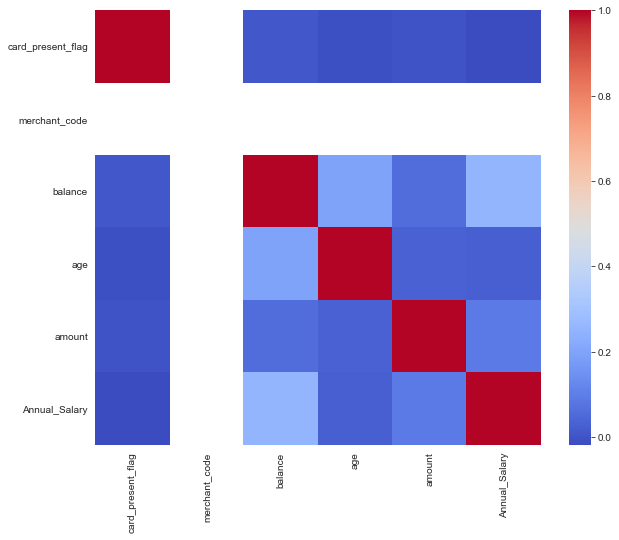

In [110]:
plt.figure(figsize=(10,8))
sns.heatmap(anz_salary_corr, cmap = 'coolwarm')

In [131]:
anz_salary1.head(5)

,balance,gender,age,amount,Annual_Salary
50,8342.11,M,23,3903.95,110828
61,2040.58,F,23,1626.48,92347
64,3158.51,M,22,983.36,55833
68,2517.66,M,24,1408.08,39973
70,2271.79,F,43,1068.04,60640


In [132]:
Gender = pd.get_dummies(anz_salary1['gender'],drop_first=True)
#Gender
anz_salary2 = pd.concat([anz_salary1,Gender], axis=1)
anz_salary2.drop('gender',axis=1,inplace=True)
anz_salary2.head(5)

,balance,age,amount,Annual_Salary,M
50,8342.11,23,3903.95,110828,1
61,2040.58,23,1626.48,92347,0
64,3158.51,22,983.36,55833,1
68,2517.66,24,1408.08,39973,1
70,2271.79,43,1068.04,60640,0


In [135]:
anz_salary2.corr()

,balance,age,amount,Annual_Salary,M
balance,1.000000,0.194956,0.287501,0.179198,0.138691
age,0.194956,1.000000,-0.138594,-0.079535,0.031567
amount,0.287501,-0.138594,1.000000,0.638000,0.181306
Annual_Salary,0.179198,-0.079535,0.638000,1.000000,0.101319
M,0.138691,0.031567,0.181306,0.101319,1.000000


In [141]:
anz_salary_exp = anz_salary.copy()

In [147]:
#anz_salary_exp = anz_salary_exp[anz_salary_exp['txn_description']!='PAY/SALARY']

In [148]:
anz_salary_exp.corr()

,balance,age,amount,Annual_Salary
balance,1.000000,0.199329,0.059178,0.253089
age,0.199329,1.000000,0.029980,0.026426
amount,0.059178,0.029980,1.000000,0.091213
Annual_Salary,0.253089,0.026426,0.091213,1.000000


In [149]:
anz_salary_exp

,txn_description,balance,gender,age,amount,customer_id,Annual_Salary
0,POS,35.39,F,26,16.25,CUS-2487424745,57553
1,SALES-POS,21.20,F,26,14.19,CUS-2487424745,57553
2,POS,5.71,M,38,6.42,CUS-2142601169,52834
3,SALES-POS,2117.22,F,40,40.90,CUS-1614226872,47032
4,SALES-POS,17.95,F,26,3.25,CUS-2487424745,57553
...,...,...,...,...,...,...,...
12038,POS,14054.14,F,30,9.79,CUS-55310383,86291
12039,SALES-POS,9137.79,M,20,63.87,CUS-2688605418,56460
12040,POS,45394.57,M,28,43.96,CUS-2663907001,98666
12041,SALES-POS,11350.67,M,69,30.77,CUS-1388323263,59226


In [150]:
anz_salary_exp.drop(['txn_description','customer_id'],axis=1,inplace=True)

In [151]:
anz_salary_exp

,balance,gender,age,amount,Annual_Salary
0,35.39,F,26,16.25,57553
1,21.20,F,26,14.19,57553
2,5.71,M,38,6.42,52834
3,2117.22,F,40,40.90,47032
4,17.95,F,26,3.25,57553
...,...,...,...,...,...
12038,14054.14,F,30,9.79,86291
12039,9137.79,M,20,63.87,56460
12040,45394.57,M,28,43.96,98666
12041,11350.67,M,69,30.77,59226


In [155]:
Gender = pd.get_dummies(anz_salary_exp['gender'],drop_first=True)
#Gender
anz_sal = pd.concat([anz_salary_exp,Gender], axis=1)
anz_sal.drop('gender',axis=1,inplace=True)
anz_sal

,balance,age,amount,Annual_Salary,M
0,35.39,26,16.25,57553,0
1,21.20,26,14.19,57553,0
2,5.71,38,6.42,52834,1
3,2117.22,40,40.90,47032,0
4,17.95,26,3.25,57553,0
...,...,...,...,...,...
12038,14054.14,30,9.79,86291,0
12039,9137.79,20,63.87,56460,1
12040,45394.57,28,43.96,98666,1
12041,11350.67,69,30.77,59226,1


<AxesSubplot:>

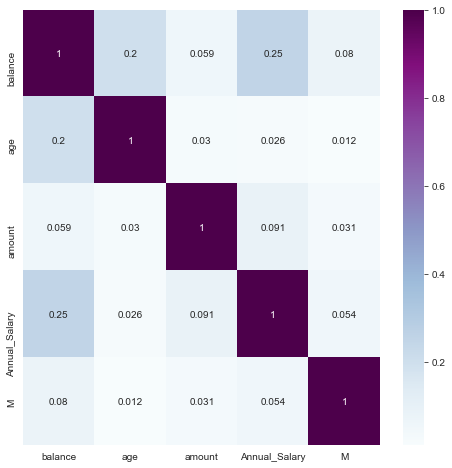

In [161]:
plt.figure(figsize=(8,8))
sns.heatmap(anz_sal.corr(), cmap='BuPu', annot=True)

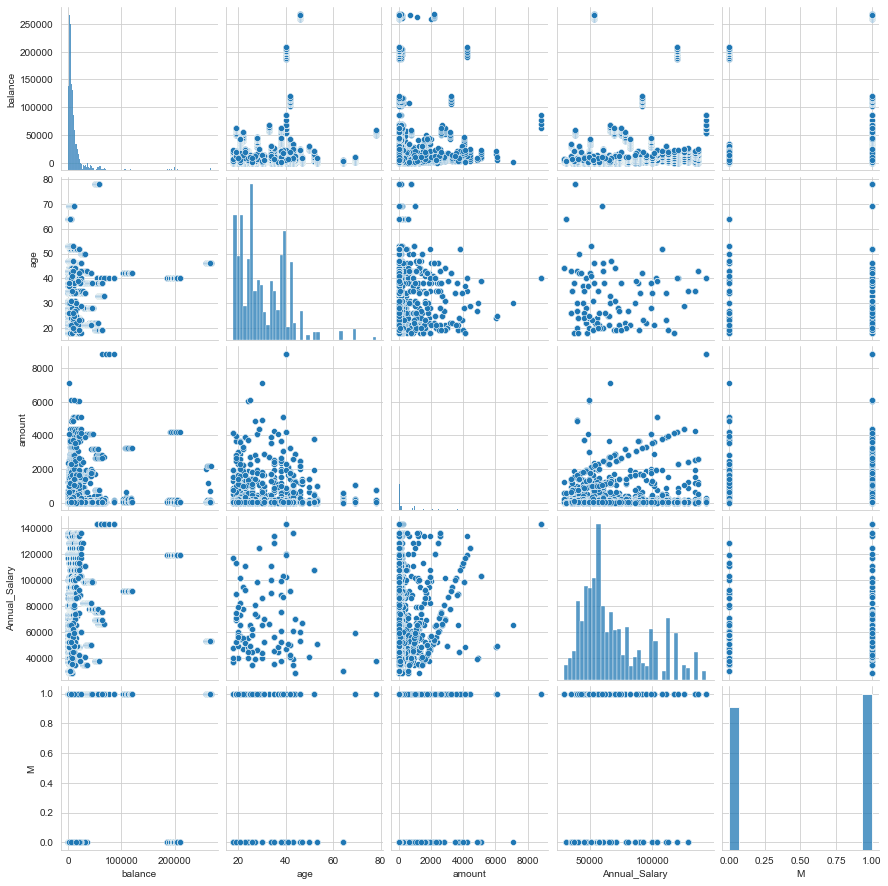

In [162]:
sns.pairplot(anz_sal)

<AxesSubplot:xlabel='age', ylabel='Annual_Salary'>

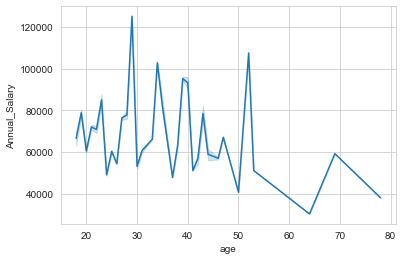

In [165]:
sns.lineplot(data=anz_sal, x='age',y='Annual_Salary')

<AxesSubplot:xlabel='amount', ylabel='Annual_Salary'>

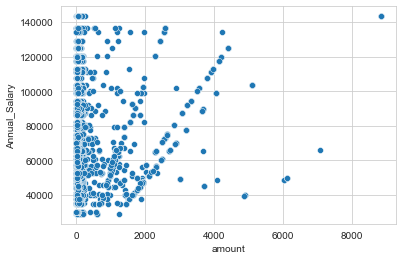

In [169]:
sns.scatterplot(data=anz_sal, x='amount',y='Annual_Salary')

<AxesSubplot:xlabel='M', ylabel='Annual_Salary'>

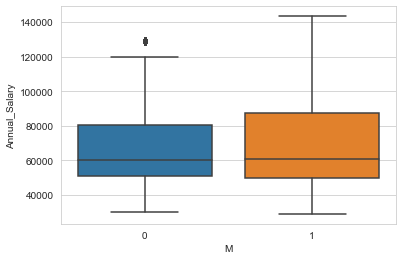

In [173]:
sns.boxplot(data=anz_sal, x='M',y='Annual_Salary')

In [177]:
anz_sal[anz_sal['M']==1]['Annual_Salary'].describe()

count      6285.000000
mean      71020.719650
std       27553.810911
min       29021.000000
25%       49536.000000
50%       60833.000000
75%       87186.000000
max      143339.000000
Name: Annual_Salary, dtype: float64

In [178]:
anz_sal[anz_sal['M']==0]['Annual_Salary'].describe()

count      5758.000000
mean      68165.406391
std       24812.581858
min       30368.000000
25%       51136.000000
50%       60114.000000
75%       80628.000000
max      128813.000000
Name: Annual_Salary, dtype: float64

#### Model 

In [179]:
anz_sal.head(5)

,balance,age,amount,Annual_Salary,M
0,35.39,26,16.25,57553,0
1,21.20,26,14.19,57553,0
2,5.71,38,6.42,52834,1
3,2117.22,40,40.90,47032,0
4,17.95,26,3.25,57553,0


In [180]:
anz_sal.shape

(12043, 5)

In [181]:
# Importing Libraries for Linear Regression/

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [183]:
X = anz_sal.drop('Annual_Salary',axis=1)
Y = anz_sal['Annual_Salary']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

In [209]:
ln = LinearRegression()

In [210]:
ln.fit(X_train,y_train)

LinearRegression()

In [211]:
Sal_predict = ln.predict(X_test)

In [212]:
len(Sal_predict)

3613

In [213]:
from sklearn import metrics

MAE: 19772.335357174637
MSE: 607048367.4081564
RMSE: 24638.351556225436


In [215]:
print("Model accuracy on Test Data", ln.score(X_test , y_test)*10)

Model accuracy on Test Data 0.8498788529128221


In [216]:
print("Model accuracy on Train Data", ln.score(X_train , y_train)*10)

Model accuracy on Train Data 0.6563376820173106


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Salary'>

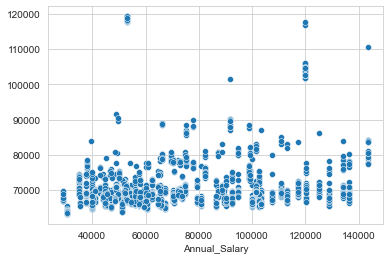

In [217]:
sns.scatterplot(y_test, Sal_predict)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Salary', ylabel='Density'>

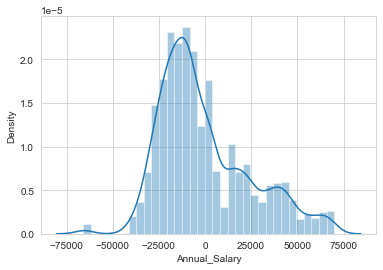

In [218]:
sns.distplot((y_test-Sal_predict))

In [219]:
ln.coef_

array([ 1.98525877e-01, -6.45855122e+01,  3.40617495e+00,  1.89605477e+03])

In [220]:
cdf = pd.DataFrame(ln.coef_,X.columns, columns=['Coeffecient'])
cdf

,Coeffecient
balance,0.198526
age,-64.585512
amount,3.406175
M,1896.054765
